In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [12]:
#load using tf.keras - 

dataset = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True
)

base_dir = os.path.join(dataset, 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (224,224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [15]:
#loas resnet

resnet_base = tf.keras.applications.ResNet50(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

#freeze the baase
resnet_base.trainable = False

In [19]:
from tensorflow.keras import layers, models

model = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid') #binary classification
])

In [21]:
model.compile(optimizer='adam',
             loss="binary_crossentropy",
             metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 506ms/step - accuracy: 0.8628 - loss: 0.3380 - val_accuracy: 0.9770 - val_loss: 0.0641
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 520ms/step - accuracy: 0.9720 - loss: 0.0776 - val_accuracy: 0.9780 - val_loss: 0.0616
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 523ms/step - accuracy: 0.9836 - loss: 0.0488 - val_accuracy: 0.9780 - val_loss: 0.0588
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 526ms/step - accuracy: 0.9858 - loss: 0.0358 - val_accuracy: 0.9800 - val_loss: 0.0705
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 538ms/step - accuracy: 0.9870 - loss: 0.0272 - val_accuracy: 0.9770 - val_loss: 0.0573


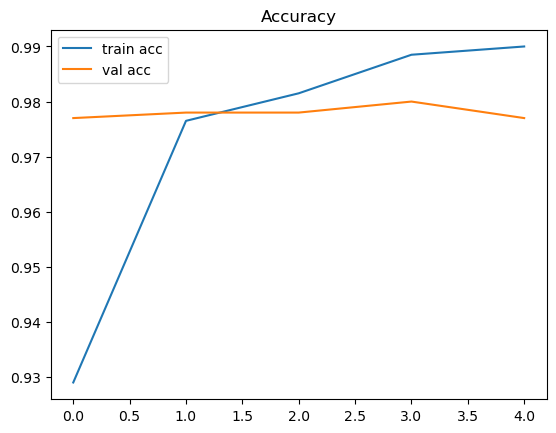

In [23]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


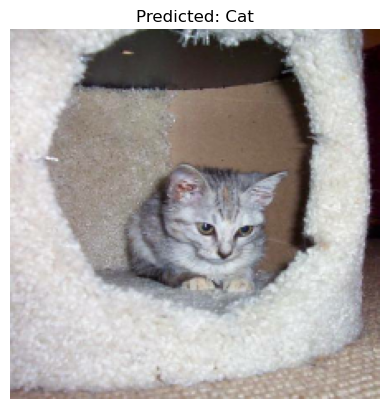

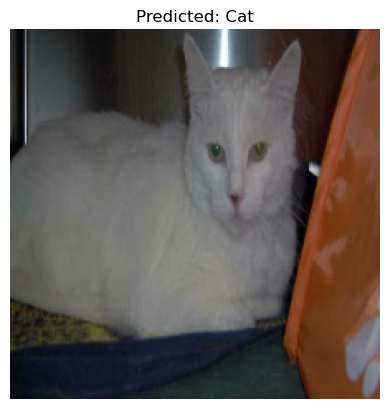

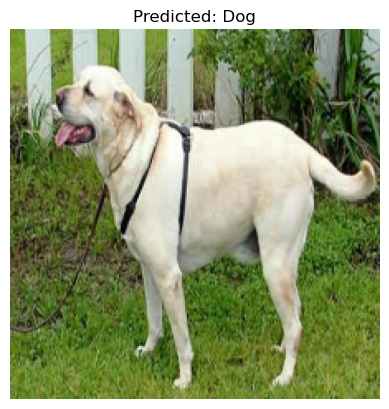

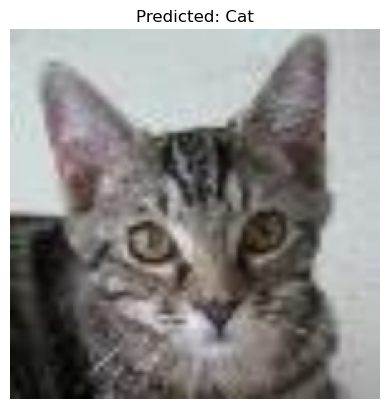

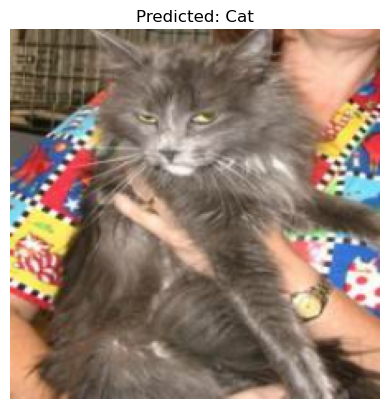

2025-06-24 22:41:33.808908: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
for image, label in val_ds.take(1):
    pred = model.predict(image)
    for i in range(5):
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title("Predicted: " + ("Dog" if pred[i] > 0.5 else "Cat"))
        plt.axis("off")
        plt.show()